In [54]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [55]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [56]:
len(X_train)

60000

In [57]:
len(X_test)

10000

In [58]:
X_train[0].shape

(28, 28)

In [ ]:
X_train

In [ ]:
X_train[0]

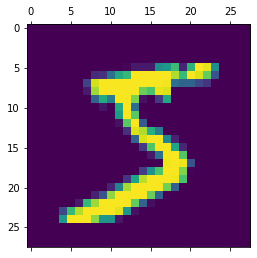

In [61]:
plt.matshow(X_train[0])

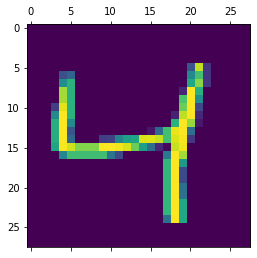

In [62]:
plt.matshow(X_train[2])

In [63]:
print(X_train[1].shape)

(28, 28)


In [64]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [65]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [66]:
len(y_train)

60000

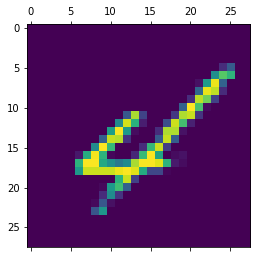

In [67]:
plt.matshow(X_train[59931])

In [68]:
X_train.shape

(60000, 28, 28)

In [69]:
X_train = X_train / 255
X_test = X_test / 255

In [70]:
print(X_train.shape)
print(X_test.shape)
X_train_flattened = X_train.reshape(len(X_train),28*28)      #into a 1-D array
X_test_flattened = X_test.reshape(len(X_test), 28*28)
print(X_train_flattened.shape)
print(X_test_flattened.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


In [71]:
model1 = keras.Sequential([               
    keras.layers.Dense(10, activation='sigmoid')   
])
model1.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']  
)
model1.fit(X_train_flattened, y_train, epochs=5)  

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8148 - loss: 0.7179
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9149 - loss: 0.3087
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9221 - loss: 0.2777
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9229 - loss: 0.2779
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9268 - loss: 0.2641


In [72]:
model2 = keras.Sequential([               
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')   
])
model2.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']  
)
model2.fit(X_train_flattened, y_train, epochs=5)  

/home/codebaker/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8689 - loss: 0.4623
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9612 - loss: 0.1329
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9727 - loss: 0.0907
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9794 - loss: 0.0682
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9847 - loss: 0.0496


In [73]:
model1.evaluate(X_test_flattened, y_test) # Gives accuracy 92.2299..

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9133 - loss: 0.3041


[0.2676014304161072, 0.9258000254631042]

In [74]:
model2.evaluate(X_test_flattened, y_test) # Gives accuracy 97.43

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9690 - loss: 0.0972


[0.08288349956274033, 0.9743000268936157]

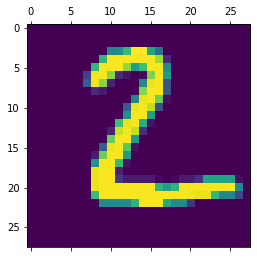

In [75]:
plt.matshow(X_test[1])

In [76]:
y_predicted1 = model1.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step


In [77]:
y_predicted2 = model2.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step


In [78]:
np.argmax(y_predicted1[1])
np.argmax(y_predicted2[1])

2

In [79]:
y_predicted_labels1 = [np.argmax(i) for i in y_predicted1]
y_predicted_labels1[:5]

[7, 2, 1, 0, 4]

In [80]:
y_predicted_labels2 = [np.argmax(i) for i in y_predicted2]
y_predicted_labels2[:5]

[7, 2, 1, 0, 4]

In [81]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [82]:
cm1 = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels1)
cm1

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    2,    2,    0,    5,    5,    2,    1,    0],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [   7,    9,  927,   17,    6,    4,   10,   10,   39,    3],
       [   4,    0,   19,  919,    0,   26,    2,   11,   24,    5],
       [   2,    2,    9,    2,  914,    0,    7,    6,    9,   31],
       [   8,    2,    3,   32,    9,  785,   12,    6,   30,    5],
       [  13,    3,   10,    1,    8,   16,  903,    2,    2,    0],
       [   1,    5,   24,    8,    7,    0,    0,  957,    3,   23],
       [   7,    8,    7,   21,    9,   24,    8,   12,  873,    5],
       [  11,    7,    1,   11,   26,    8,    0,   34,    9,  902]],
      dtype=int32)>

In [83]:
cm2 = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels2)
cm2

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    1,    2,    1,    0,    1,    2,    1,    2,    1],
       [   0, 1127,    3,    1,    0,    1,    1,    0,    2,    0],
       [   3,    1, 1015,    0,    2,    0,    1,    2,    8,    0],
       [   0,    1,   12,  980,    1,    0,    0,    5,    7,    4],
       [   0,    0,    5,    0,  955,    0,    3,    1,    3,   15],
       [   5,    3,    0,   15,    2,  840,    6,    1,   14,    6],
       [   5,    3,    2,    1,    4,    1,  937,    0,    5,    0],
       [   1,    6,   14,    1,    0,    0,    0,  997,    2,    7],
       [   2,    0,    5,    4,    2,    0,    2,    4,  952,    3],
       [   3,    5,    0,    5,   11,    2,    0,    7,    5,  971]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

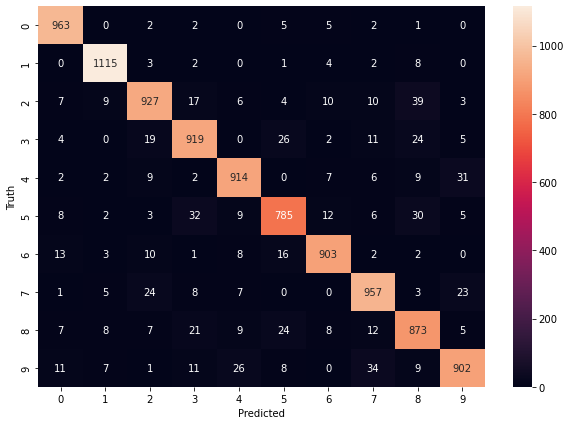

In [84]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm1, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(69.0, 0.5, 'Truth')

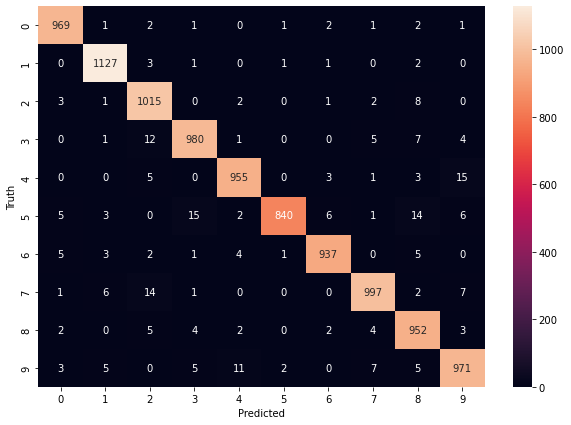

In [85]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm2, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')